In [1]:

import pickle
import sys

sys.path.insert(1, './functions/')

from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
from importlib import  reload

import os
from utility import create_folder


scale = 5
SMALL_SIZE = 4*scale
MEDIUM_SIZE = 6*scale
BIGGER_SIZE = 8*scale
LINE_WIDTH = 2*2
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=LINE_WIDTH)



# single ARD
$$l(\alpha_i) = \log\alpha_i -\log(\alpha_i + g_i)+\frac{q_i^2}{\alpha_i + g_i}$$







$g'_i = x_i^2tr(C^{'-1}_{-i}), \\
q'^2_i = x_i^2(\boldsymbol{y}-\boldsymbol{\mu})^T
C_{-i}^{'-2}
(\boldsymbol{y}-\boldsymbol{\mu})$, 



$C_{-i}' =L^{-1} +\sum_{d\neq i} \alpha_d^{-1} x_d^2 I_N$,    




In [2]:
def simulation_q2_s(q2 = 10, s = 20,alphas = np.logspace(-7, 7, num=100)):  
    
    ls = np.zeros(len(alphas))
    
    for i in range(len(alphas)):
        alpha = alphas[i]
        ls[i] = np.log10(alpha) -np.log10(alpha +s)+ q2/(alpha +s)
    return ls
    
def plot_alphas_ls(alphas, ls, type ='more', savefig = None):
    scale = 0.039 *5# mm to inche
    fig, ax = plt.subplots(figsize = (60*scale,50*scale))
    ax.plot(np.log10(alphas), ls ,'k')

    # ax.set_xlabel(r'$\log \alpha_i$')
    # ax.set_ylabel(r'$l(\alpha_i)$')
    ax.set_xlabel(r'$\log \theta_i$')
    ax.set_ylabel(r'$l(\theta_i)$')
    if type =='more':
        ax.set_title(r'$q_i^2 > g_i$')
        # ax.set_title(r'$\psi> \zeta_{-i}$')
    elif type =='less':
        ax.set_title(r'$q_i^2 \leq g_i$')
        # ax.set_title(r'$\psi \leq \zeta_{-i}$')
    if savefig is not None:
        plt.tight_layout()
        fig.savefig(savefig)
    plt.show()




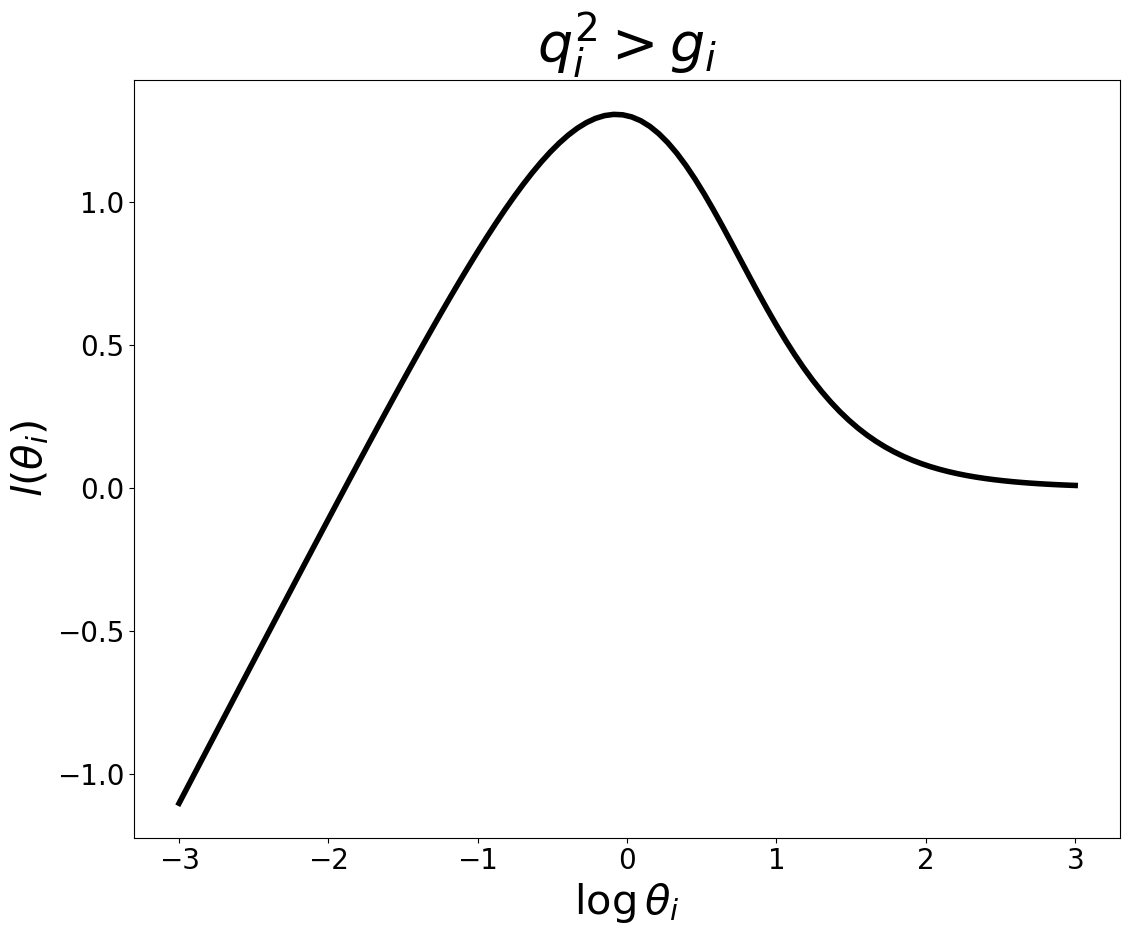

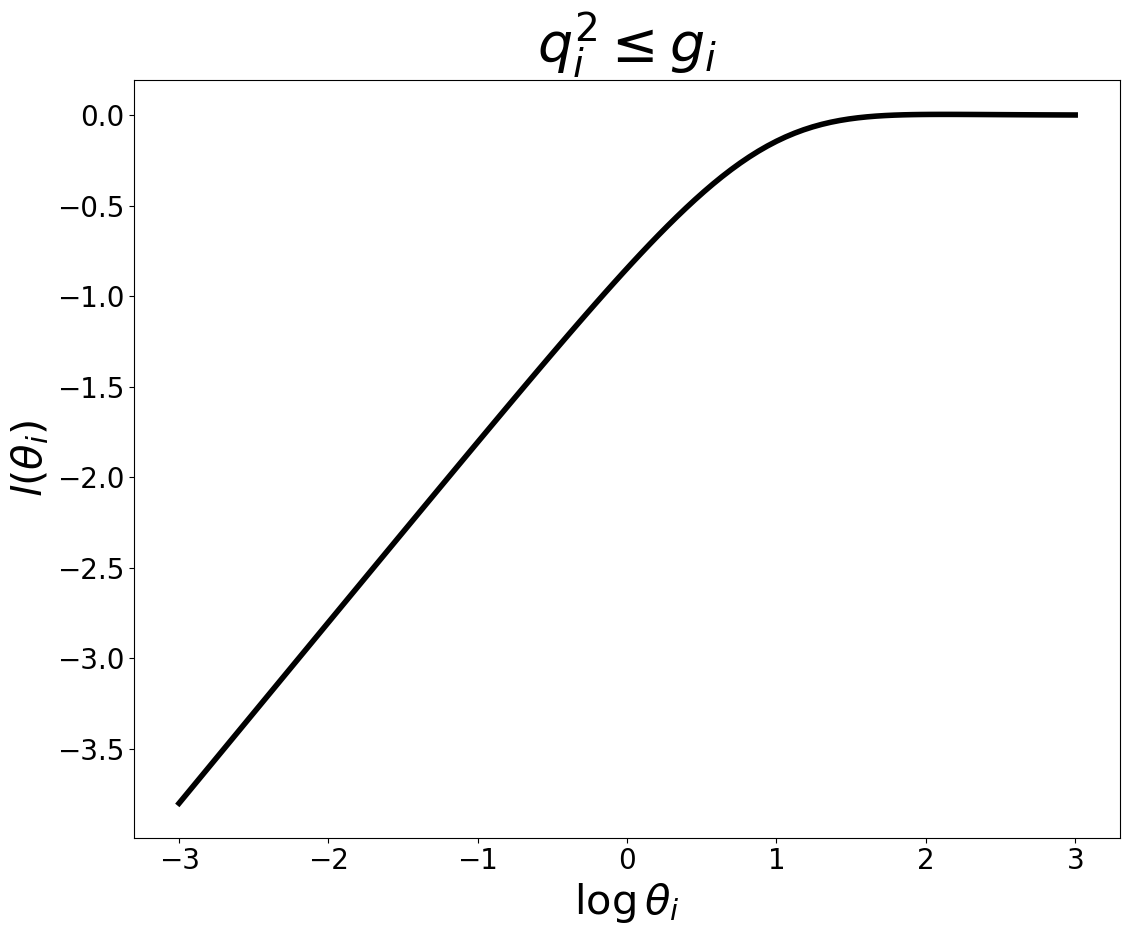

In [3]:
alphas = np.logspace(-3, 3, num=100)
ls= simulation_q2_s(q2 = 10, s = 4,alphas = alphas)
savepath = './figs/sparsity/'
create_folder(savepath)
savefig = os.path.join(savepath, 'l_alpha_more.pdf')

plot_alphas_ls(alphas, ls, type ='more', savefig =savefig )

ls= simulation_q2_s(q2 = 10, s = 20, alphas = alphas)
savefig = os.path.join(savepath, 'l_alpha_leq.pdf')

plot_alphas_ls(alphas, ls, type = 'less',savefig = savefig)


$\rho = \frac{q^2}{g}-1$

$q^2 = (\rho +1)g$

In [4]:
def simulation_q2s_ss(s = 10, alphas = np.logspace(-7, 7, num=200),ratio  = np.linspace(-1,1, 100),thre = 1e-3):
    
    ls = np.zeros((len(alphas), len(ratio)))

    for i in range(len(alphas)):
        for j in range(len(ratio)):
            q2 = s*ratio[j]+s
            alpha = alphas[i]
            ls[i,j] = np.log10(alpha) -np.log10(alpha +s)+ q2/(alpha +s)

    indx = np.argmax(ls, axis = 0)
    max_array = np.zeros(ls.shape)

    for j in range(ls.shape[1]): # for all ratio, 
        max_array[indx[j],j] = 1 # max = 1
            
        if np.abs(ls[i,j] - ls[indx[j],j])/np.mean(np.abs(ls[:,j])) <thre: 
            
            max_array[indx[j],j] = 0# max = 0
            max_array[-1,j] = 1

    return alphas, ls, ratio, max_array

def imshow_alphas_ls(alphas, ls,ratio,max_array=None,  vmax = 8, show_max = False, savefig=None):
    scale = 0.039*5
    fig, ax = plt.subplots(figsize = (65*scale,50*scale))
   

    im = ax.imshow(ls.T,aspect = 'auto', cmap = 'jet', vmin = -vmax, vmax = vmax); 
    max_idx = np.argmax(ls, axis = 0)
    # ls_max = ls[:,max_idx]

    if show_max:
        ax.imshow(max_array.T, aspect ='auto',vmin = 0, vmax = 1,alpha = 0.2,  cmap = 'hot');

    
    # ax.plot(ls_max)

    # ax.set_xlabel(r'$\log \alpha_i$')
    ax.set_ylabel(r'$\frac{q^2_i-g_i}{g_i}$')
    ax.set_xlabel(r'$\log \theta_i$')
    # ax.set_ylabel(r'$\frac{\psi-\zeta_{-i}}{\zeta_{-i}}$')
    nx,ny = ls.shape
    ax.set_xticks(np.linspace(0,nx-1,6))
    ax.set_xticklabels(np.around(np.linspace(np.log10(alphas).min(), np.log10(alphas).max(), 6), 0))
    ax.set_yticks(np.linspace(0,ny-1,7))
    ax.set_yticklabels(np.around(np.linspace(ratio.min(),ratio.max(), 7) , 1))
    fig.colorbar(im)
    # ax.set_title(r'$l(\alpha_i)$')
    ax.set_title(r'$l(\theta_i)$')
    if savefig is not None:
        plt.tight_layout()
        fig.savefig(savefig)

    plt.show()



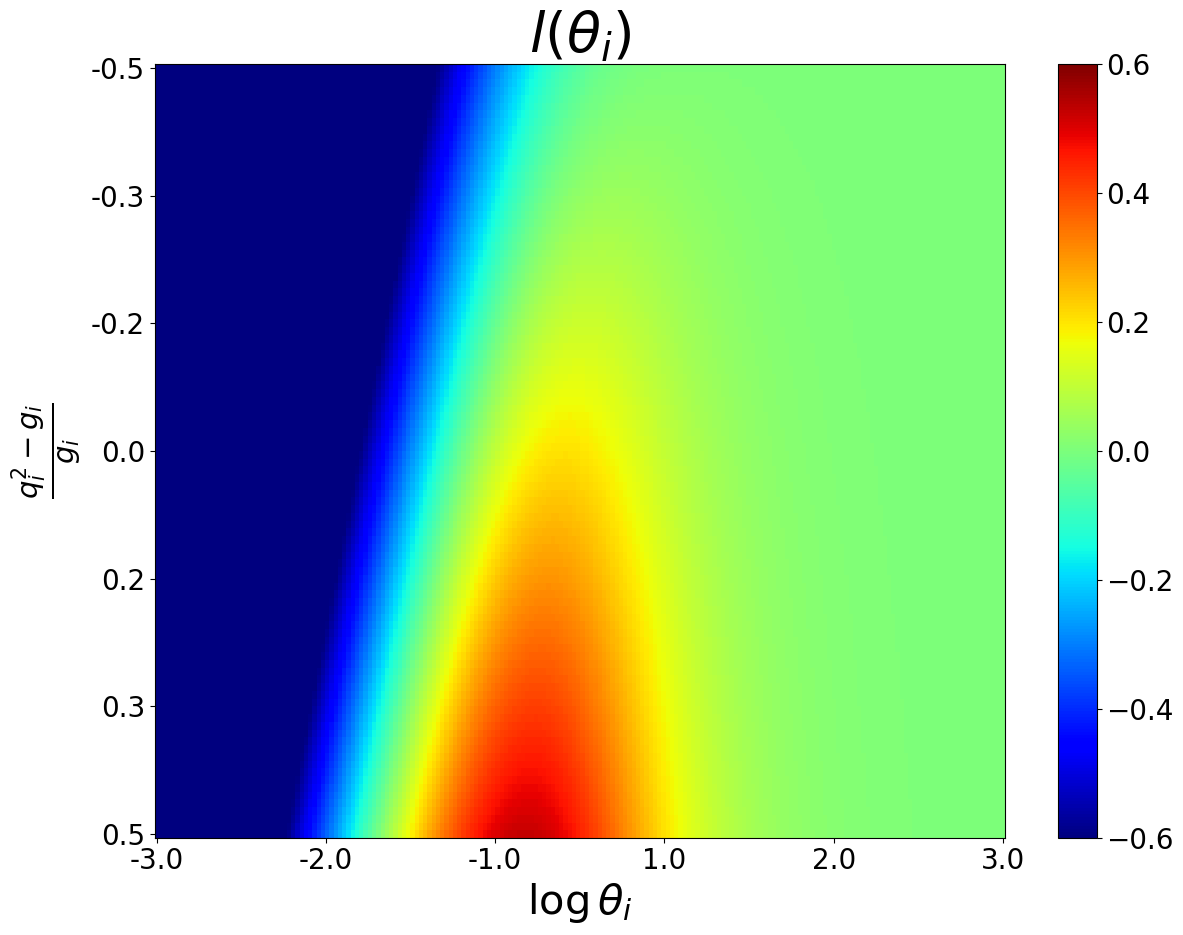

In [23]:

alphas, ls , ratio,max_array= simulation_q2s_ss(s = 1,alphas = np.logspace(-3, 3, num=200),
                                                 ratio  = np.linspace(-0.5,0.5, 100), thre=0.01)

savefig = os.path.join(savepath, 'imshow_l_alpha.pdf') 
imshow_alphas_ls(alphas, ls,ratio,max_array, vmax =0.6, show_max = False,savefig = savefig)

# dual ARD
$$l(\alpha_i) = \log\alpha_i -\log(\alpha_i + g_i)+\frac{q_i^2}{\alpha_i + g_i}$$

$
    g_i = x_i^2tr(C^{-1}_{-i}), \\
    q^2_i = x_i^2(y-\mu)^TC_{-i}^{-2} (y-\mu) 
$

$C_{-i}' =L^{-1} +\sum_{d\neq i} \alpha_d^{-1} x_d^2 I_N$,    


if assume there is only one $x_d$, and $L ^{-1} = 0$
$$l(\alpha_i|x_d) = \log\alpha_i -\log(\alpha_i + x_d^{-2}g'_i)+\frac{x_d^{-4}q_i^{'2}}{\alpha_i + x_d^{-2}g'_i}$$


$
    g_i = x_d^{-2}x_i^2tr(C'^{-1}_{-i}), \\
    q^2_i = x_d^{-4}x_i^2(y-\mu)^TC_{-i}^{'-2} (y-\mu) 
$

$C_{-i}' = \alpha_d^{-1}  I_N$,    





(200, 100)


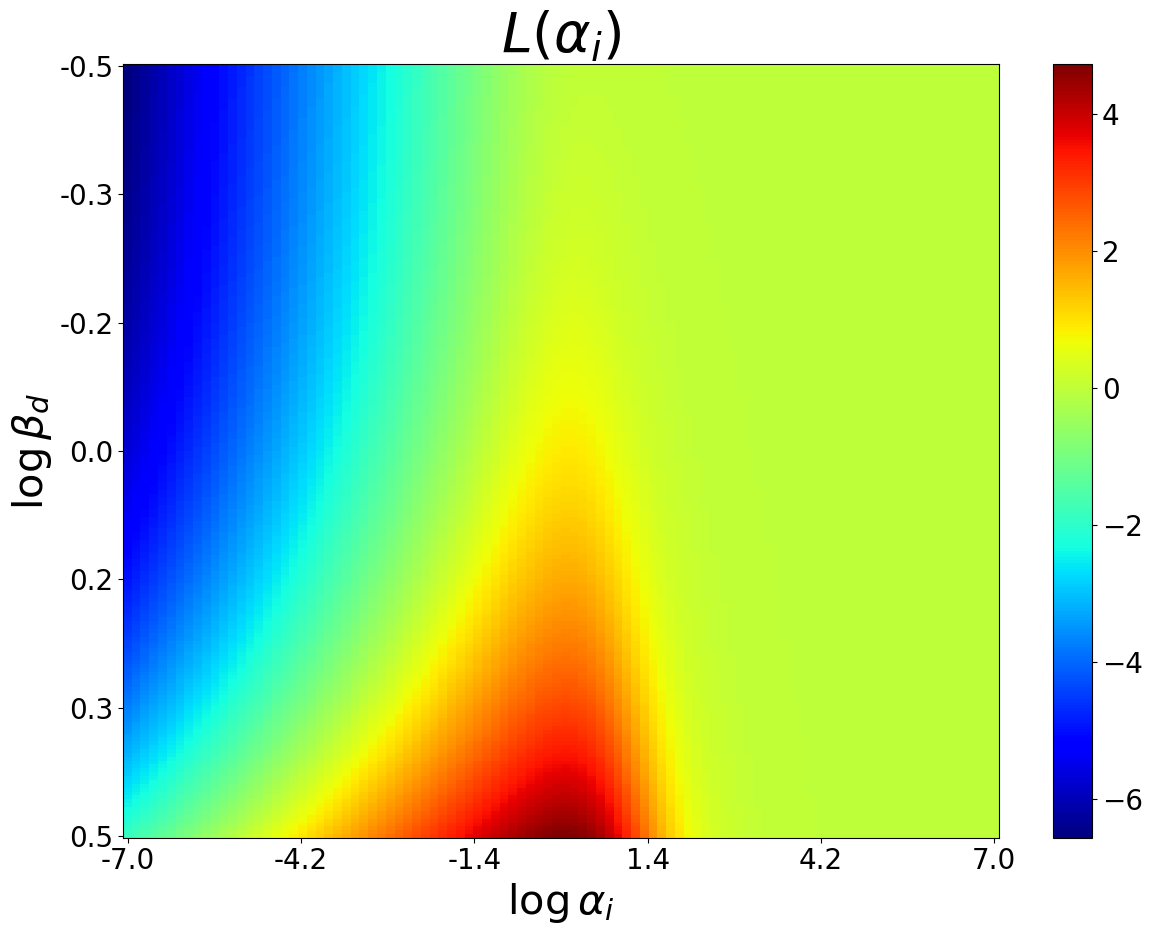

In [50]:
def simulation_q2_s_xd(q2 = 10, s = 20,xds = None, alphas = None):
    if xds is None:
        xds = np.logspace(-7, 7, num=100)
    if alphas is None:
        alphas = np.logspace(-7, 7, num=100)
    ls_all = np.zeros(( len(xds),len(alphas)))
    print(ls_all.shape)
    for d in range(len(xds)):
        xd = xds[d]
        for i in range(len(alphas)):
            alpha = alphas[i]
            ls_all[d,i] = np.log10(alpha) -np.log10(alpha +xd*s)+ (xd)**2*q2/(alpha +(xd)*s)
    
    
    return alphas, xds,ls_all
    
def imshow_alphas_xds_ls(alphas, xds, ls_all,savefig = None):
    scale = 0.039*5
    fig, ax = plt.subplots(figsize = (65*scale,50*scale))
    
    im = ax.imshow(ls_all,aspect = 'auto', cmap = 'jet', ); 
    max_idx = np.argmax(ls, axis = 0)

    ax.set_xlabel(r'$\log \alpha_i$')
    ax.set_ylabel(r'$\log \beta_d$')
    ny,nx = ls_all.shape
    ax.set_xticks(np.linspace(0,nx-1,6))
    ax.set_xticklabels(np.around(np.linspace(np.log10(alphas).min(), np.log10(alphas).max(), 6), 1))
    ax.set_yticks(np.linspace(0,ny-1,7))
    ax.set_yticklabels(np.around(np.linspace(np.log10(xds).min(), np.log10(xds).max(), 7), 1))

    fig.colorbar(im)
    ax.set_title(r'$L(\alpha_i)$')
    plt.tight_layout()

    if savefig is not None:
        fig.savefig(savefig)

    plt.show()
    
alphas, xds,ls_all =  simulation_q2_s_xd(q2 = 10, s = 5,xds = np.logspace(-0.5,0.5, num=200), alphas = np.logspace(-7, 7, num=100))
savefig = os.path.join(savepath, 'imshow_l_alpha_beta.pdf')

imshow_alphas_xds_ls(alphas, xds, ls_all,savefig = savefig)



## $ l(\beta_{i})$
$$
    l(\beta_{i}) = 
        -\frac{1}{2}\log(1 + \beta_i^{-1} g_i)
           -\frac{1}{2} \frac{q_i^2}{\beta_i+ g_i}
$$
where we set



$g_i =\boldsymbol{w}_i^TC^{-1}_{-i}\boldsymbol{w}_i$, 

$q^2 =(y-\mu)^T C_{-i} ^{-1}\boldsymbol{w}_i\boldsymbol{w}_i^T C_{-i} ^{-1}(y-\mu)= (\boldsymbol{w}_i^T C_{-i} ^{-1}(y-\mu))^2$. 

$C_{-i} =L^{-1}+\sum_{d\neq i} \beta_d^{-1} \boldsymbol{w}_d\boldsymbol{w}_d^T$. 

(201, 201)


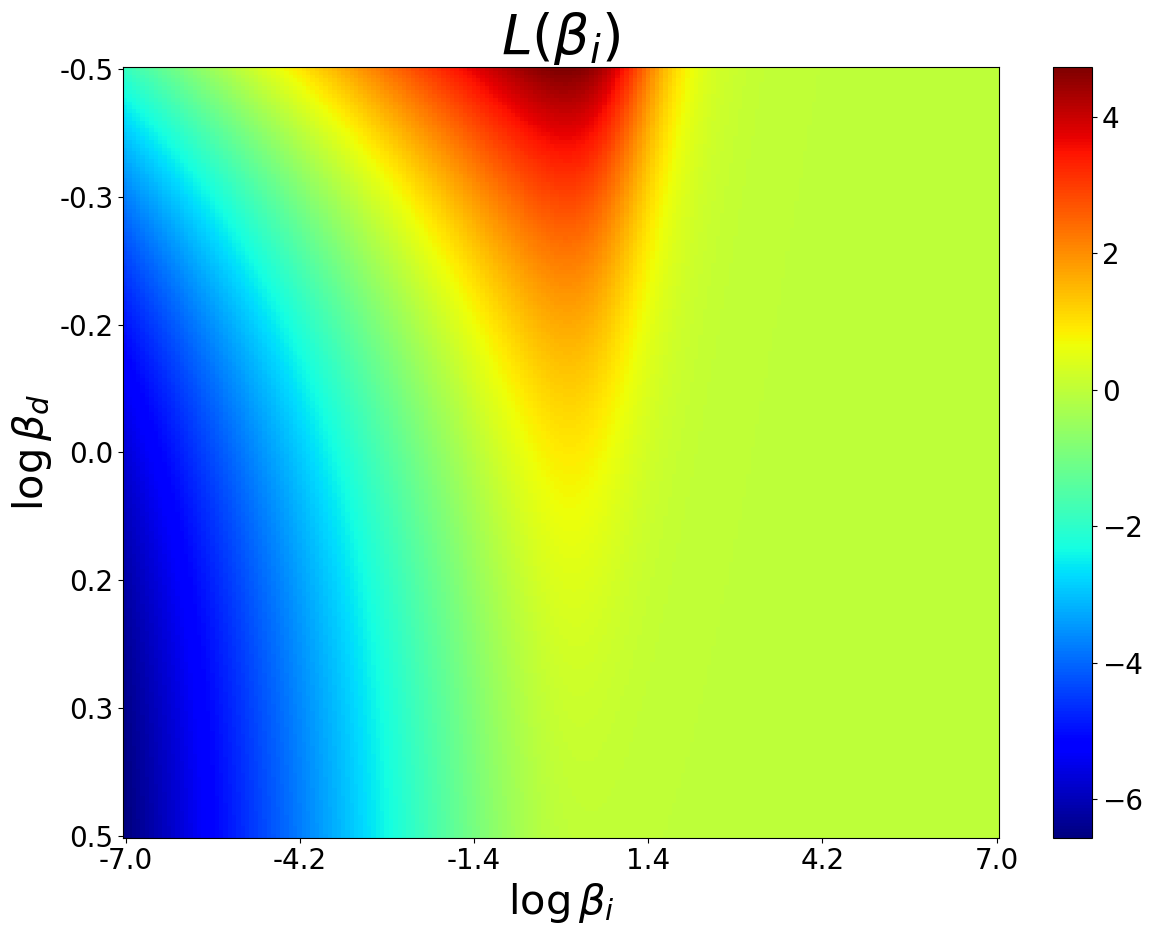

In [61]:
def simulation_q2_s_betad(q2 = 10, s = 20,betas = None, betads = None):
    if betas is None:
        betas = np.logspace(-7, 7, num=100)
    if betads is None:
        betads = np.logspace(-7, 7, num=100)
    ls_all = np.zeros(( len(betas),len(betads)))
    print(ls_all.shape)
    for d in range(len(betads)):
        betad = betads[d]
        for i in range(len(betas)):
            beta = betas[i]
            ls_all[d,i] = np.log10(beta) -np.log10(beta +1/betad*s)+ (1/betad)**2*q2/(beta +1/betad*s)
    
    
    return betas, betads,ls_all
    
def imshow_betas_betads_ls(betas, betads, ls_all,savefig = None):
    scale = 0.039*5
    fig, ax = plt.subplots(figsize = (65*scale,50*scale))

    im = ax.imshow(ls_all,aspect = 'auto', cmap = 'jet', ); 
    max_idx = np.argmax(ls, axis = 0)

    ax.set_xlabel(r'$\log \beta_i$')
    ax.set_ylabel(r'$\log \beta_d$')
    ny,nx = ls_all.shape
    ax.set_xticks(np.linspace(0,nx-1,6))
    ax.set_xticklabels(np.around(np.linspace(np.log10(betas).min(), np.log10(betas).max(), 6), 1))
    ax.set_yticks(np.linspace(0,ny-1,7))
    ax.set_yticklabels(np.around(np.linspace(np.log10(betads).min(), np.log10(betads).max(), 7), 1))

    fig.colorbar(im)
    ax.set_title(r'$L(\beta_i)$')
    plt.tight_layout()

    if savefig is not None:
        fig.savefig(savefig)

    plt.show()
    
betas, betads,ls_all =  simulation_q2_s_betad(q2 = 10, s = 5,betads = np.logspace(-0.5, 0.5, num=201), betas = np.logspace(-7, 7, num=201))
savefig = os.path.join(savepath, 'imshow_l_alpha_beta.pdf')

imshow_betas_betads_ls(betas, betads, ls_all,savefig = savefig)


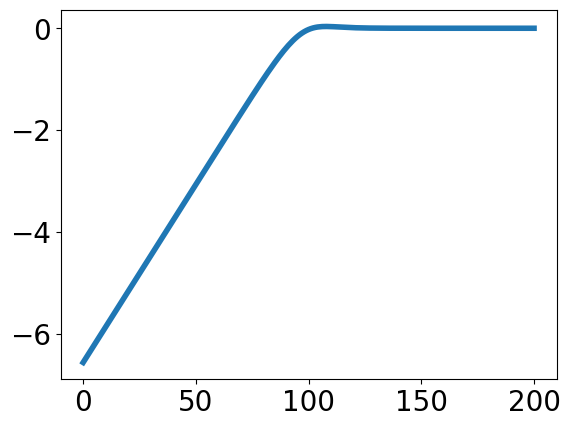

In [65]:
plt.plot(ls_all[200,:])